In [3]:
! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [8]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin'

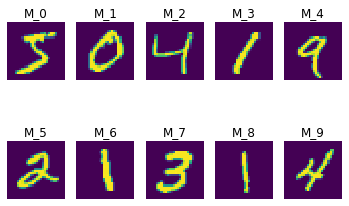

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 58us/step - loss: 0.2611 - acc: 0.9205 - val_loss: 0.0932 - val_acc: 0.9728
Epoch 2/20
54000/54000 [==============================] - 2s 44us/step - loss: 0.1071 - acc: 0.9671 - val_loss: 0.0856 - val_acc: 0.9733
Epoch 3/20
54000/54000 [==============================] - 2s 45us/step - loss: 0.0769 - acc: 0.9759 - val_loss: 0.0804 - val_acc: 0.9812
Epoch 4/20
54000/54000 [==============================] - 2s 45us/step - loss: 0.0625 - acc: 0.9814 - val_loss: 0.0686 - val_acc: 0.9823
Epoch 5/20
54000/54000 [==============================] - 2s 45us/step - loss: 0.0506 - acc: 0.9850 - val_loss: 0.0686 - val_acc: 0.9827
Epoch 6/20
54000/54000 [==============================] - 3s 46us/step - loss: 0.0441 - acc: 0.9865 - val_loss: 0.0824 - val_acc: 0.9808
Epoch 7/20
54000/54000 [==============================] - 3s 48us/step - loss: 

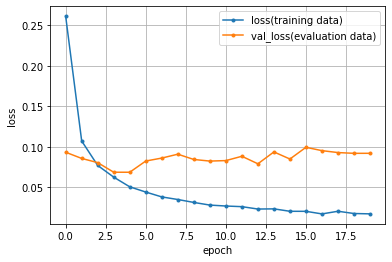

In [9]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import CSVLogger
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("M_%d" % i)
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)
plt.show()

x_train = x_train.reshape(60000, 784).astype("float32")
x_test = x_test.reshape(10000, 784).astype("float32")
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation("softmax"))

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# model.summary()

model.compile(loss="categorical_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])

import time
start = time.time()
csv_logger = CSVLogger("training.log")
hist = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_split=0.1,
                callbacks=[csv_logger])
end = time.time()
print(f'elasped time:{end - start}s')

score = model.evaluate(x_test, y_test, verbose=0)
print("test_loss:", score[0])
print("test_acc:", score[1])

loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label = "loss(training data)")
plt.plot(range(epochs), val_loss, marker='.', label = "val_loss(evaluation data)")
plt.legend(loc="best")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
